In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
nltk.download('stopwords')
from nltk import FreqDist
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
Bussiness=pd.read_csv('/content/business_data.csv')
Education=pd.read_csv('/content/education_data.csv')
Entertainment=pd.read_csv('/content/entertainment_data.csv')
Sports=pd.read_csv('/content/sports_data.csv')
Tech=pd.read_csv('/content/technology_data.csv')

In [ ]:
# combine all the dataframes
df = pd.concat([Bussiness,Education,Entertainment,Sports,Tech])

In [ ]:
# Shuffling the rows
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
df.head()

,headlines,description,content,url,category
38,Minecraft now available at a discounted price ...,"Minecraft, the iconic video game that has sold...","Minecraft, the video game that has sold more c...",https://indianexpress.com/article/technology/g...,technology
819,IND vs AUS: ‘Shock opener steals back Aussie i...,Australian media have turned gung-ho at the en...,The Sydney Morning Herald led with the headlin...,https://indianexpress.com/article/sports/crick...,sports
633,7 ways to check if someone blocked you on Inst...,Wondering if someone blocked you on Instagram?...,Confused about whether someone blocked you on ...,https://indianexpress.com/article/technology/t...,technology
1788,Animal actor Siddhant Karnick opens up about s...,Animal actor Siddhant Karnick spoke about the ...,"Sandeep Reddy Vanga’s film Animal, starring Ra...",https://indianexpress.com/article/entertainmen...,entertainment
1129,Ever evolving Rohit Sharma is cricket’s Kamal ...,"Like those annually upgraded Apple-products, R...",Are we watching Rohit Sharma 2.0? But haven’t ...,https://indianexpress.com/article/sports/crick...,sports


In [ ]:
# resetting the index
df.reset_index(inplace=True)

In [ ]:
df.head()

,index,headlines,description,content,url,category
0,38,Minecraft now available at a discounted price ...,"Minecraft, the iconic video game that has sold...","Minecraft, the video game that has sold more c...",https://indianexpress.com/article/technology/g...,technology
1,819,IND vs AUS: ‘Shock opener steals back Aussie i...,Australian media have turned gung-ho at the en...,The Sydney Morning Herald led with the headlin...,https://indianexpress.com/article/sports/crick...,sports
2,633,7 ways to check if someone blocked you on Inst...,Wondering if someone blocked you on Instagram?...,Confused about whether someone blocked you on ...,https://indianexpress.com/article/technology/t...,technology
3,1788,Animal actor Siddhant Karnick opens up about s...,Animal actor Siddhant Karnick spoke about the ...,"Sandeep Reddy Vanga’s film Animal, starring Ra...",https://indianexpress.com/article/entertainmen...,entertainment
4,1129,Ever evolving Rohit Sharma is cricket’s Kamal ...,"Like those annually upgraded Apple-products, R...",Are we watching Rohit Sharma 2.0? But haven’t ...,https://indianexpress.com/article/sports/crick...,sports


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        10000 non-null  int64 
 1   headlines    10000 non-null  object
 2   description  10000 non-null  object
 3   content      10000 non-null  object
 4   url          10000 non-null  object
 5   category     10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB


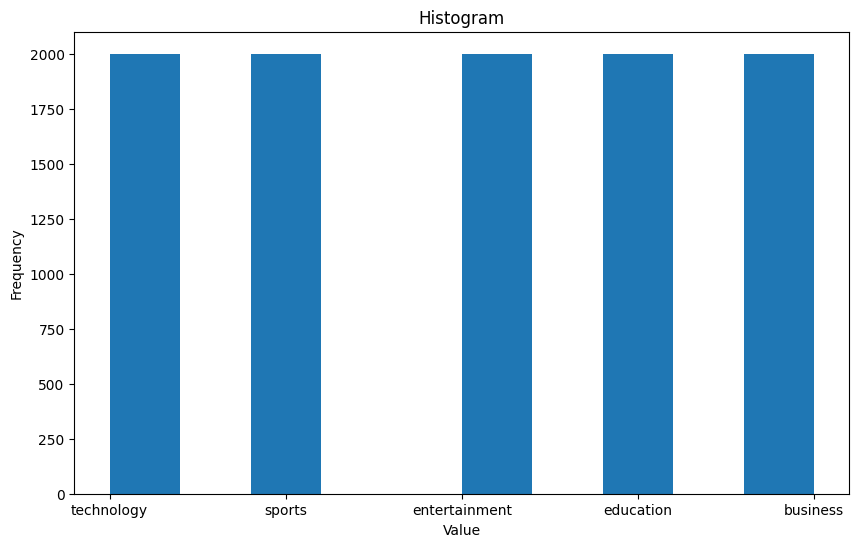

In [ ]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(df['category'])
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# removing the index and url columns
df.drop(columns=["index","url"],inplace=True)

In [ ]:
df['category'].value_counts()

,count
category,
technology,2000
sports,2000
entertainment,2000
education,2000
business,2000


In [ ]:
# mapping each of the categories to a label
def map_category(category):
    category_map = {
        'sports': 0,
        'business': 1,
        'entertainment': 2,
        'education': 3,
        'technology': 4
    }
    return category_map.get(category, -1)
df['Category'] = df['category'].apply(map_category)

In [ ]:
df.drop(columns=['category'],inplace=True)

In [ ]:
df.head()

,headlines,description,content,Category
0,Minecraft now available at a discounted price ...,"Minecraft, the iconic video game that has sold...","Minecraft, the video game that has sold more c...",4
1,IND vs AUS: ‘Shock opener steals back Aussie i...,Australian media have turned gung-ho at the en...,The Sydney Morning Herald led with the headlin...,0
2,7 ways to check if someone blocked you on Inst...,Wondering if someone blocked you on Instagram?...,Confused about whether someone blocked you on ...,4
3,Animal actor Siddhant Karnick opens up about s...,Animal actor Siddhant Karnick spoke about the ...,"Sandeep Reddy Vanga’s film Animal, starring Ra...",2
4,Ever evolving Rohit Sharma is cricket’s Kamal ...,"Like those annually upgraded Apple-products, R...",Are we watching Rohit Sharma 2.0? But haven’t ...,0


In [ ]:
# joining the columns to create one and then will drop the columns
df['Content'] = df['headlines'] + ' ' + df['description'] + ' ' + df['content']

df.drop(['headlines', 'description', 'content'], axis=1, inplace=True)

In [ ]:
df.head()

,Category,Content
0,4,Minecraft now available at a discounted price ...
1,0,IND vs AUS: ‘Shock opener steals back Aussie i...
2,4,7 ways to check if someone blocked you on Inst...
3,2,Animal actor Siddhant Karnick opens up about s...
4,0,Ever evolving Rohit Sharma is cricket’s Kamal ...


In [ ]:
total_word_count = 0
for content in df['Content']:
    total_word_count += sum(1 for _ in content.split())
print(total_word_count)

2646524


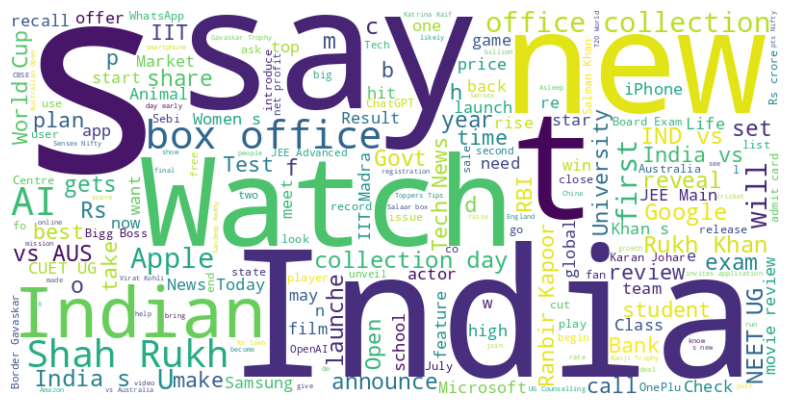

In [ ]:
# visualize the highest occurence of each of the words in the content using a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(df['Content'].to_string())

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
total_word_count = 0
for content in df['Content']:
    total_word_count += sum(1 for _ in content.split())
print(total_word_count)

2646524


In [ ]:
ps = PorterStemmer()

In [ ]:
def stemming(content):
    # remove all characters other than non-alphanumeric, dot (.) and space
    stemmed_content = re.sub(r'[^a-zA-Z0-9. ]', ' ', content)
    stemmed_content = stemmed_content.lower()
    # split the sentence into words
    stemmed_content = stemmed_content.split()
    # stemming of the words and remove if it is a stopword
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    # form the sentence back again
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [ ]:
df['Content'] = df['Content'].apply(stemming)

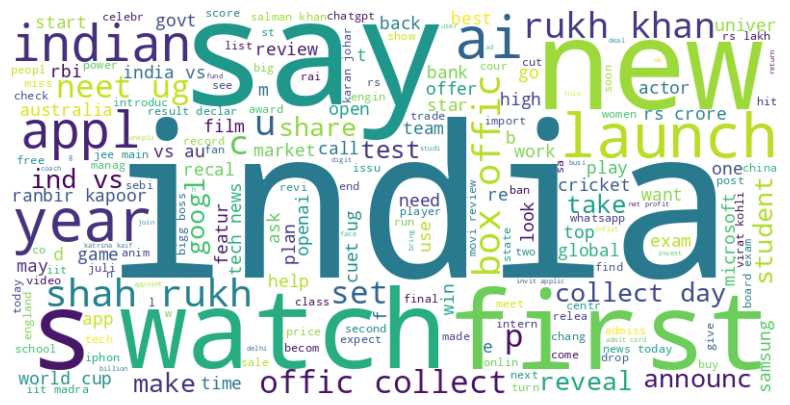

In [ ]:
# visualize the highest occurence after preprocessing
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(df['Content'].to_string())

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#total number of words after data cleaning
total_word_count = 0
for content in df['Content']:
    total_word_count += sum(1 for _ in content.split())
print(total_word_count)

1670584


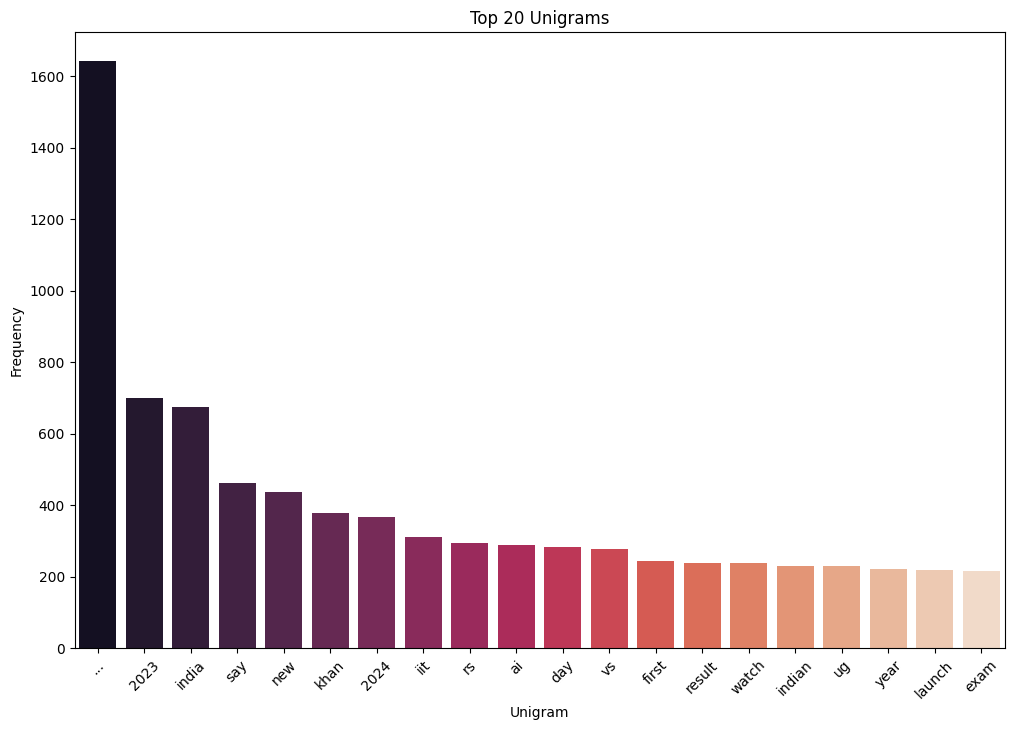

In [ ]:
# count unigrams (word frequencies)
unigram_freq = Counter(df['Content'].to_string().split())

# convert frequency distribution to DataFrame for easy plotting
df_u = pd.DataFrame(unigram_freq.items(), columns=['Unigram', 'Frequency'])
df_u = df_u.sort_values(by='Frequency', ascending=False)  # sort by frequency

# get the top 20 unigrams
top_20_unigrams = df_u.head(20)

## plot the top 20 unigrams
plt.figure(figsize=(12, 8))
sns.barplot(x='Unigram', y='Frequency', data=top_20_unigrams, palette = 'rocket')
plt.xticks(rotation=45)  # rotate x labels for better readability
plt.title('Top 20 Unigrams')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.show()

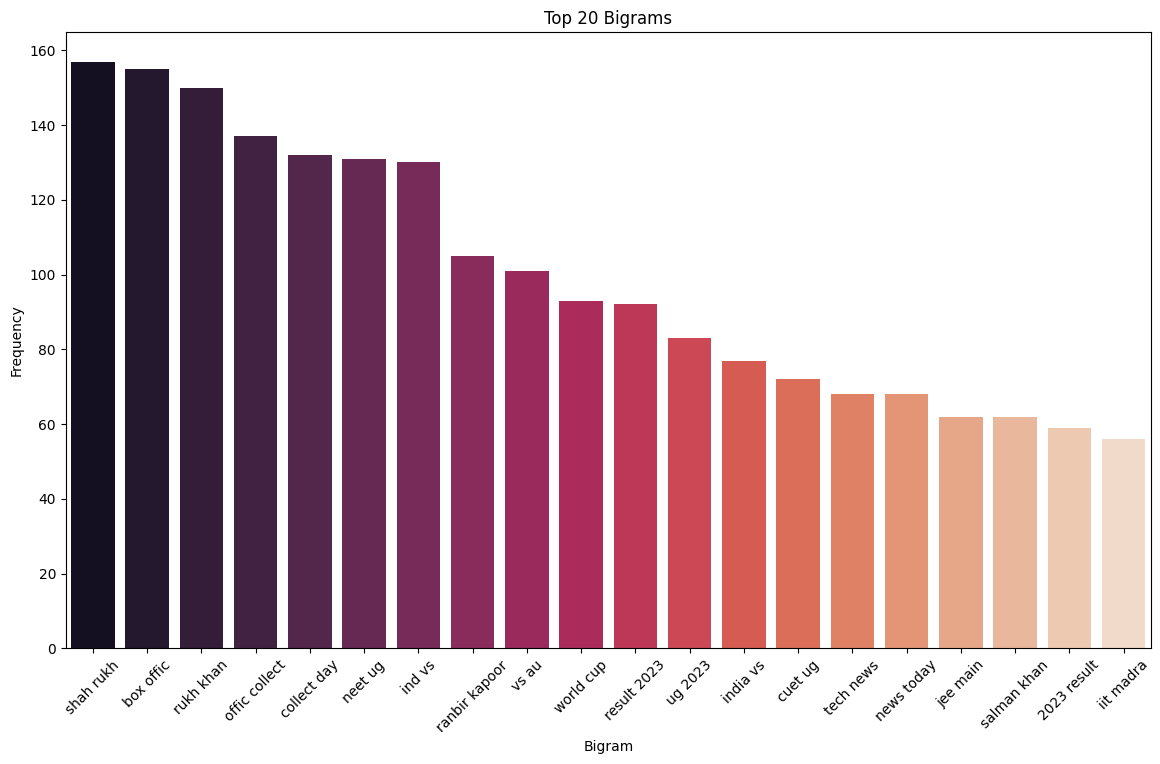

In [ ]:
from nltk.util import bigrams

# generate bigrams
bi_grams = list(bigrams(df['Content'].to_string().split()))

# count bigrams (bigram frequencies ie. combination of two words)
bi_gram_freq = Counter(bi_grams)

# convert frequency distribution to DataFrame for easy plotting
df_b = pd.DataFrame(bi_gram_freq.items(), columns=['Bigram', 'Frequency'])
df_b['Bigram'] = df_b['Bigram'].apply(lambda x: ' '.join(x))  # Convert bigram tuples to string

# get the top 20 bigrams
top_20_bigrams = df_b.nlargest(20, 'Frequency')

# plot the top 20 bigrams
plt.figure(figsize=(14, 8))
sns.barplot(x='Bigram', y='Frequency', data=top_20_bigrams, palette = 'rocket')
plt.xticks(rotation=45)  # rotate x labels
plt.title('Top 20 Bigrams')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.show()

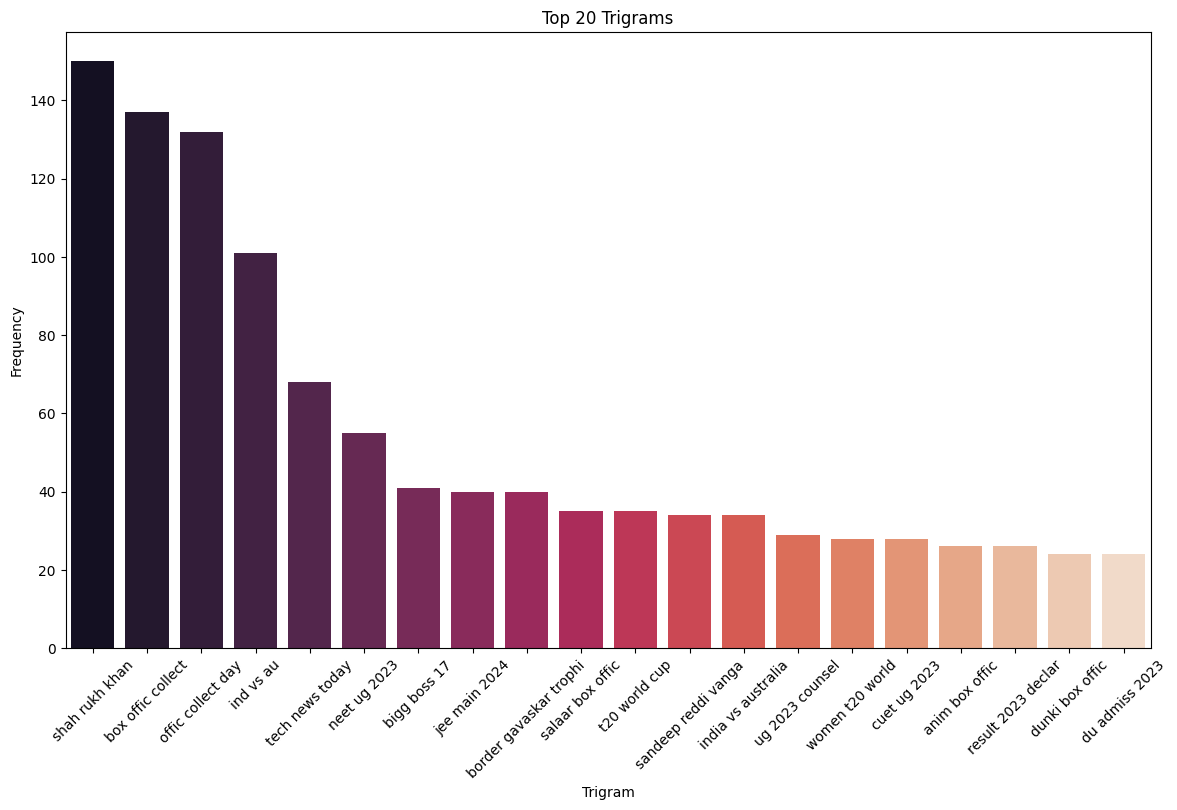

In [ ]:
from nltk.util import trigrams
from collections import Counter
tri_grams = list(trigrams(df['Content'].to_string().split()))

# count trigrams (trigram frequencies)
tri_gram_freq = Counter(tri_grams)

# convert frequency distribution to DataFrame for easy plotting
df_t = pd.DataFrame(tri_gram_freq.items(), columns=['Trigram', 'Frequency'])
df_t['Trigram'] = df_t['Trigram'].apply(lambda x: ' '.join(x))  # Convert trigram tuples to string

# sort DataFrame by frequency
df_t = df_t.sort_values(by='Frequency', ascending=False)

# get the top 20 trigrams
top_20_trigrams = df_t.nlargest(20, 'Frequency')

# plot the top 20 trigrams
plt.figure(figsize=(14, 8))
sns.barplot(x='Trigram', y='Frequency', data=top_20_trigrams, palette = 'rocket')
plt.xticks(rotation=45)  # rotate x labels for better readability
plt.title('Top 20 Trigrams')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.head()

,Category,Content
0,4,minecraft avail discount price rs 29 rs 690 mi...
1,0,ind vs au shock open steal back aussi initi ly...
2,4,7 way check someon block instagram wonder some...
3,2,anim actor siddhant karnick open scene fling b...
4,0,ever evolv rohit sharma cricket kamal dasavath...


In [ ]:
X = df['Content']
Y = df['Category']

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset into train and test subset. stratify using target
# feature category such that each subset has equal distribution of category
X_train , X_test , y_train , y_test  = train_test_split(X, Y, test_size = 0.2 , stratify = Y , random_state = 42)

In [ ]:
# Vectorization
vc = TfidfVectorizer()
X_train = vc.fit_transform(X_train)
X_test = vc.transform(X_test)

In [ ]:
# Apply Machine Learning Models
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

In [ ]:
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict = True)
    results.append({
        'Model': model_name,
        'Accuracy': report['accuracy'],
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1 Score': report['macro avg']['f1-score']
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='F1 Score', ascending=False, inplace=True)

In [ ]:
# results
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.9835,0.983578,0.9835,0.983510
2,Random Forest,0.9735,0.973809,0.9735,0.973594
3,Gradient Boosting,0.9710,0.971102,0.9710,0.971036
1,Decision Tree,0.9065,0.906719,0.9065,0.906578


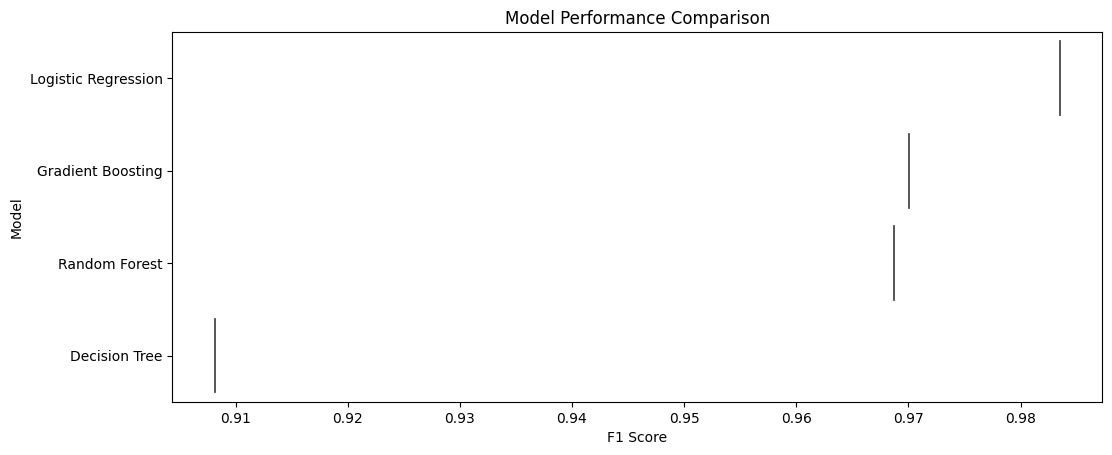

In [ ]:
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='F1 Score', y='Model')
plt.title('Model Performance Comparison')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.show()

In [ ]:
#Choosing the final Model based on the above results
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
def val_to_category(val):
    category_map = {
        0:'Sports',
        1:'Business',
        2:'Entertainment',
        3:'Education',
        4:'Technology'
     }
    return category_map.get(val,-1)

In [ ]:
def make_predictions(headlines,	description, content):
    text = headlines + " "+description +" "+ content
    text = stemming(text)
    text = vc.transform([text])
    val = model.predict(text)
    val = val_to_category(int(val[0]))
    print("News category is:",val)

In [ ]:
# test the model in custom text
make_predictions("ambani earns 10M in a hour" ," Mukesh Ambani earnd 10M ruppes in a single hour","Mukesh Ambani the chairman of Reliance Industries Limited has earns around 10M ruppes every single hour this shows the that how much potential in there in indian market")

News category is: Business


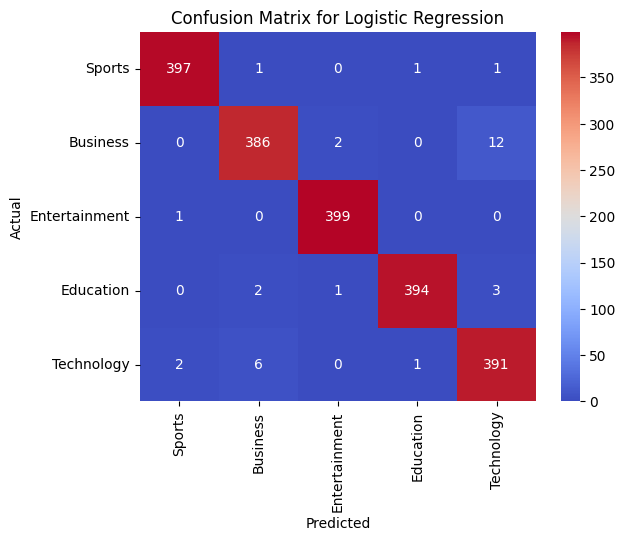

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Sports', 'Business', 'Entertainment', 'Education', 'Technology'],
            yticklabels=['Sports', 'Business', 'Entertainment', 'Education', 'Technology'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()